Random Forest Data exploration


In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [13]:

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [11]:
df_forestfires = pd.read_csv('/content/forestfires.csv')

In [ ]:
df_forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df_forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
(df_forestfires['month'])

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [ ]:
(df_forestfires['DMC'])

0       26.2
1       35.4
2       43.7
3       33.3
4       51.3
       ...  
512     56.7
513     56.7
514     56.7
515    146.0
516      3.0
Name: DMC, Length: 517, dtype: float64

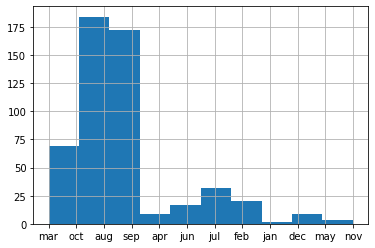

In [ ]:
df_forestfires.month.hist()

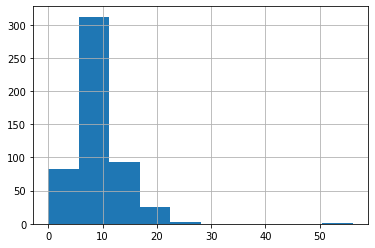

In [ ]:
df_forestfires.ISI.hist()

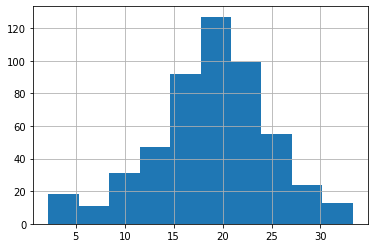

In [ ]:
df_forestfires.temp.hist()

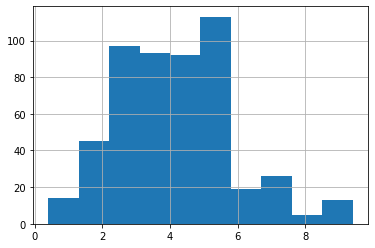

In [ ]:
df_forestfires.wind.hist()

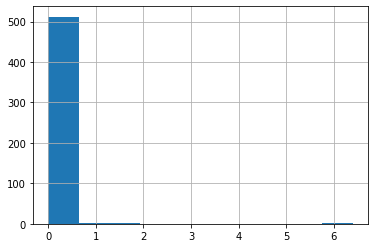

In [ ]:
df_forestfires.rain.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

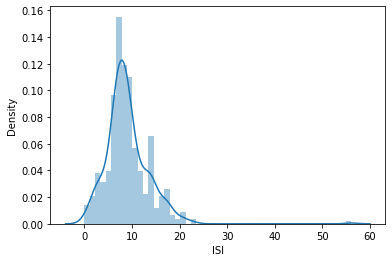

In [ ]:
sns.distplot(df_forestfires['ISI'])
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

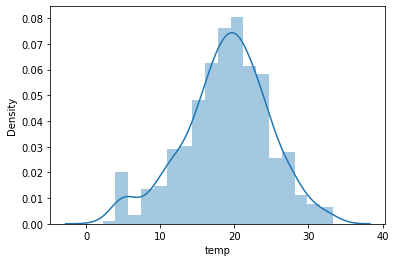

In [ ]:
sns.distplot(df_forestfires['temp'])
plt.plot()

In [ ]:
np.unique(df_forestfires['wind'])

array([0.4, 0.9, 1.3, 1.8, 2.2, 2.7, 3.1, 3.6, 4. , 4.5, 4.9, 5.4, 5.8,
       6.3, 6.7, 7.2, 7.6, 8. , 8.5, 8.9, 9.4])

In [ ]:
np.unique(df_forestfires['rain'])

array([0. , 0.2, 0.4, 0.8, 1. , 1.4, 6.4])

In [ ]:
df_forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df_forestfires.isnull()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_forestfires.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [ ]:
df_forestfires.tail(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.0


In [ ]:
df_forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df_forestfires.head(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [ ]:
df_forestfires.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [ ]:
df_forestfires.loc[6]

X            8
Y            6
month      aug
day        mon
FFMC      92.3
DMC       88.9
DC       495.6
ISI        8.5
temp      24.1
RH          27
wind       3.1
rain         0
area         0
Name: 6, dtype: object

In [ ]:
df_forestfires.loc[6:10]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0
10,7,5,sep,sat,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,0.0


In [ ]:
df_forestfires.iloc[6:10]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
df_forestfires.dtypes #untuk mengetahui data types setiap kolom

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
df_forestfires1 = df_forestfires[['DMC','DC']]

In [ ]:
df_forestfires1.head()

,DMC,DC
0,26.2,94.3
1,35.4,669.1
2,43.7,686.9
3,33.3,77.5
4,51.3,102.2


In [ ]:
df_forestfires1.tail()

,DMC,DC
512,56.7,665.6
513,56.7,665.6
514,56.7,665.6
515,146.0,614.7
516,3.0,106.7


In [ ]:
df_forestfires1.isnull()

,DMC,DC
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
512,False,False
513,False,False
514,False,False
515,False,False


In [ ]:
df_forestfires1.isnull().any()

DMC    False
DC     False
dtype: bool

In [ ]:
df_forestfires1.loc[4]

DMC     51.3
DC     102.2
Name: 4, dtype: float64

In [ ]:
df_forestfires1.loc[1:3]

,DMC,DC
1,35.4,669.1
2,43.7,686.9
3,33.3,77.5


In [ ]:
df_forestfires1.iloc[1:3]

,DMC,DC
1,35.4,669.1
2,43.7,686.9


In [ ]:
df_forestfires['rain'].unique()

array([0. , 0.2, 1. , 6.4, 0.8, 0.4, 1.4])

In [ ]:
df_forestfires['wind'].unique()

array([6.7, 0.9, 1.3, 4. , 1.8, 5.4, 3.1, 2.2, 7.2, 4.5, 4.9, 2.7, 5.8,
       3.6, 7.6, 6.3, 8.9, 8.5, 9.4, 0.4, 8. ])

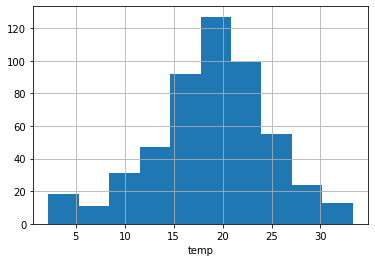

In [ ]:
df_forestfires['temp'].hist()
plt.xlabel('temp')
plt.show()

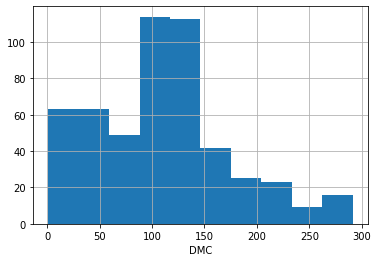

In [ ]:
df_forestfires['DMC'].hist()
plt.xlabel('DMC')
plt.show()

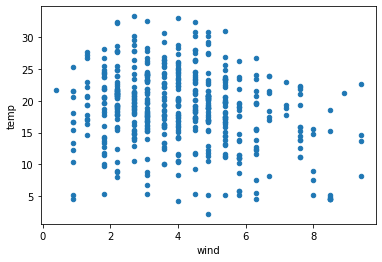

In [ ]:
df_forestfires.plot(kind= 'scatter', x= 'wind', y ='temp' )
plt.show()

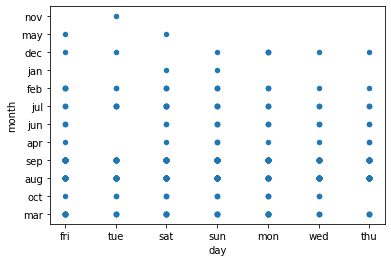

In [ ]:
df_forestfires.plot(kind= 'scatter', x= 'day', y ='month' )
plt.show()

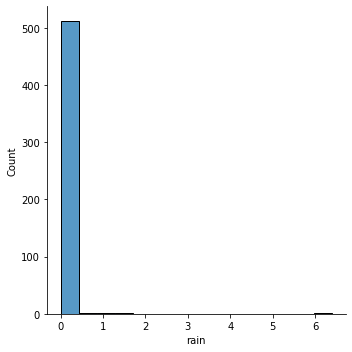

In [ ]:
sns.displot(df_forestfires['rain'], bins=15)
plt.show()

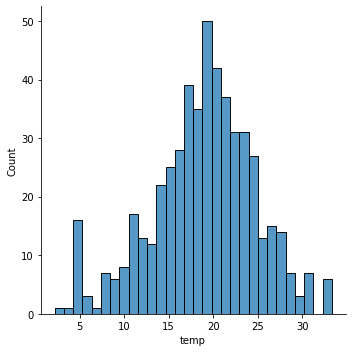

In [ ]:
sns.displot(df_forestfires['temp'], bins=30)
plt.show()

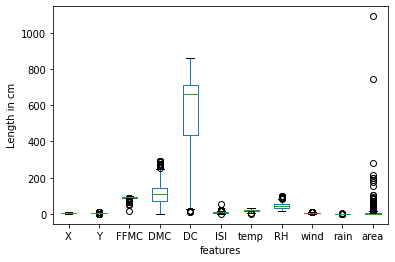

In [ ]:
#matplotlib
df_forestfires.plot(kind='box')
plt.xlabel('features')
plt.ylabel('Length in cm')
plt.show()

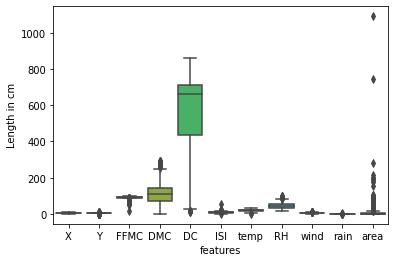

In [ ]:
#seaborn
sns.boxplot(data=df_forestfires)
plt.xlabel('features')
plt.ylabel('Length in cm')
plt.show()

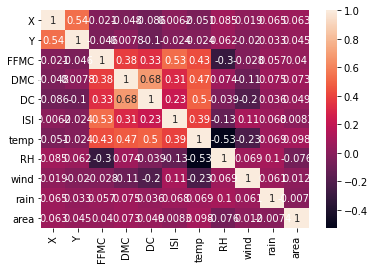

In [ ]:
sns.heatmap(data=df_forestfires.corr(), annot = True)
plt.show()

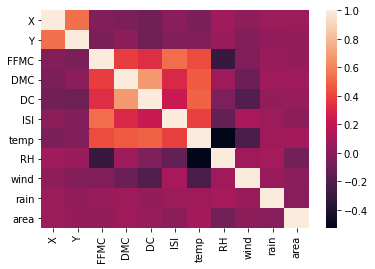

In [ ]:
sns.heatmap(data=df_forestfires.corr(), annot = False)
plt.show()

In [ ]:
print('Total data:', df_forestfires.shape[0])
print('Total features:', df_forestfires.shape[1])

Total data: 517
Total features: 13


In [ ]:
def binary_step(x):
    
    if x<0:
        return 0
    else:
        return 1

In [ ]:
binary_step(5), binary_step(-10)

(1, 0)

In [ ]:
def sigmoid_function(x):
    
    z = (1/(1 + np.exp(-x)))
    
    return z

In [ ]:
sigmoid_function(5), sigmoid_function(-10)

(0.9933071490757153, 4.5397868702434395e-05)

In [ ]:
def swish_function(x):
    
    return x/(1-np.exp(-x))

In [ ]:
swish_function(5), swish_function(-10)

(5.033918274531521, 0.00045401991009687764)

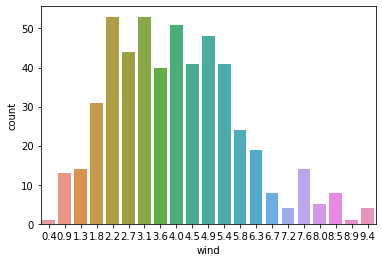

In [ ]:
sns.countplot(x='wind', data=df_forestfires)
plt.show()

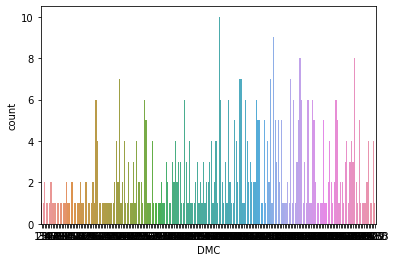

In [ ]:
sns.countplot(x='DMC', data=df_forestfires)
plt.show()

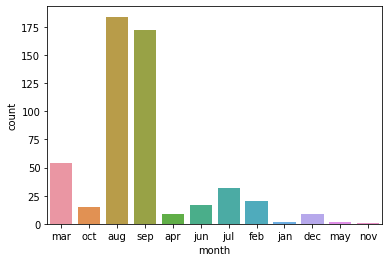

In [ ]:
sns.countplot(x='month', data=df_forestfires)
plt.show()

In [12]:
sns.countplot(x='month', data=df_forestfires1)
plt.show()

NameError: ignored

In [ ]:
df_forestfires.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split